# **Differential Calculus**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

plt.rcParams["text.usetex"] = True
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False

plt.style.use("seaborn-v0_8-whitegrid")


### **1. Single Variable Function**

**Function derivative and what does it say.**

The definition of a straight line in slope-intercept form is:  
$$ y = mx + b $$  
where $m$ is the slope and $b$ indicates the y-intercept. Knowing two points on the line, we can determine its slope:  
$$ m = \frac{y_1 - y_0}{x_1 - x_0} $$  
The slope of a line tells us how the value of $y$ changes for any change in $x$. If $m > 0$, $y$ increases as $x$ increases, and if $m < 0$, $y$ decreases as $x$ increases.  

A tangent (line) to the function $f(x)$ at the point $x_0$ tells us how $f(x)$ changes at $x_0$. If the slope of the tangent at $x_0$ is zero, then $f(x)$ reaches an extremum.

The derivative $f'(x_0)$ of the function $f(x)$ is defined as the slope of the tangent to $f(x)$ at $x_0$:  
$$ m = \frac{dy}{dx} = \frac{y_1 - y_0}{x_1 - x_0} = \frac{f(x_1) - f(x_0)}{x_1 - x_0} $$  
Substituting $h = x_1 - x_0$ and letting $h \to 0$, we get:  
$$ f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h} $$

Consider the function $f(x)$. For minima of $f(x)$, the values of the derivative just to the left of $x_0$ are negative, and the values just to the right of $x_0$ are positive. For maxima, it is the opposite. However, this is not always the case. The derivative can also be zero in so-called saddle points. In such cases, the slope can remain negative (or positive) both to the left and right of $x_0$. Therefore, the first derivative $f'(x)$ alone is insufficient to determine the type of extremum. To identify the type, the second derivative $f''(x)$ is required.  
- If $f''(x_0) < 0$, then in $x_0$ is a maximum.  
- If $f''(x_0) > 0$, then in $x_0$ is a minimum.  
- If $f''(x_0) = 0$, it is not possible to determine whether in $x_0$ is a minimum or a maximum.  

In such cases, the behavior of $f'(x)$ in the vicinity of $x_0$ must be analyzed further.

 f(x): x**3 - x + 1
∇f(x): 3*x**2 - 1


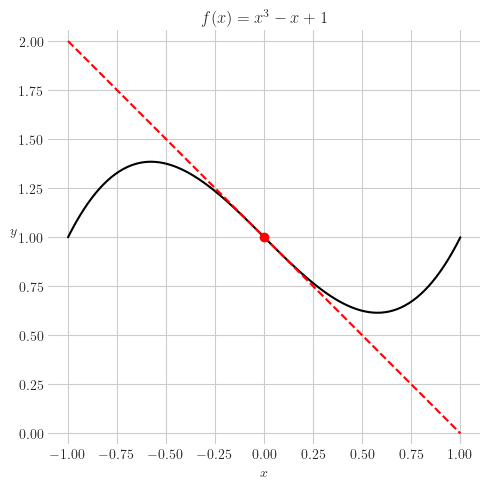

In [2]:
def tangent_line(f, x, x0, slope):
    return slope * (x - x0) + f(x0)


x = sp.symbols("x")
y = x**3 - x + 1
y_vec = np.vectorize(sp.lambdify(x, y))

xv = np.linspace(-1, 1, 100)
yv = y_vec(xv)

grad_y = sp.diff(y, x)

x0 = 0
grad_in_x0 = sp.lambdify(x, grad_y)(x0)
tangent = tangent_line(y_vec, xv, x0, grad_in_x0)

print(" f(x):", y)
print("∇f(x):", grad_y)

fig = plt.figure(figsize=(5, 5), tight_layout=True)
plt.plot(xv, yv, color="black")
plt.plot(xv, tangent, color="red", linestyle="--")
plt.scatter(x0, y.subs(x, x0), color="red", zorder=3)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$", rotation=0)
plt.axis("equal")
plt.title(rf"$f(x) = {sp.latex(y)}$")
plt.show()

### **2. Multi Variable Function**

**Gradients.**

The gradient tells us how a function of more than one variable changes and in which direction it changes the most.  

The mathematical definition of the gradient is:  
$$ \nabla f(\mathbf{x}) = \begin{bmatrix} 
\frac{\partial f}{\partial x_1} \\ 
\frac{\partial f}{\partial x_2} \\ 
\vdots \\ 
\frac{\partial f}{\partial x_n} 
\end{bmatrix} $$  
where $$\mathbf{x} = [x_1, x_2, \dots, x_n]^\top$$ represents the variables of the function $f(\mathbf{x})$.  

The gradient $\nabla f(\mathbf{x})$ points in the direction of the steepest ascent of $f$ and its magnitude represents the rate of change in that direction.

The gradient gives us a set of equations that describe the direction and magnitude of the change in the function $f$ at a given point. In the case of a single variable, at each point, we only have one slope of the tangent. When moving to an $n$-dimensional space, we have infinitely many slope coefficients at a given point. In such a space, we can imagine a tangent to the graph of the function $f$ pointing in any direction, and its slope tells us how the value of the function changes in that direction.

The rate of change in a specific direction can be found using the directional derivative. The directional derivative is the dot product between the gradient at a given point and the unit vector pointing in the desired direction:

$$ D_{\mathbf{u}} f(\mathbf{x}) = \mathbf{u} \cdot \nabla f(\mathbf{x}) = \|\mathbf{u}\| \|\nabla f(\mathbf{x})\| \cos(\theta)$$

where $\mathbf{u}$ is the unit vector in the direction of interest, and $\nabla f(\mathbf{x})$ is the gradient of $f$ at the point $\mathbf{x}$.

The directional derivative reaches its maximum when $\cos(\theta) = 1$, which occurs when $\theta = 0$. This means that the gradient of the function points in the direction where the function values change the most, and its magnitude indicates the rate of change in that direction. 

Thus, the gradient vector not only gives the direction of the steepest ascent but also provides the magnitude of the steepest change in the function at a given point.


In [3]:
x = sp.symbols("x")
y = sp.symbols("y")
z = x**2 + y**2

xv = np.linspace(-1, 1, 25)
yv = np.linspace(-1, 1, 25)
xv, yv = np.meshgrid(xv, yv, indexing="xy")
zv = np.vectorize(sp.lambdify((x, y), z))(xv, yv)

grad_z = tuple(sp.diff(z, v) for v in (x, y))  # [dz/dx, dz/dy]
print(" f(x, y):", z)
print("∇f(x, y):", grad_z)

 f(x, y): x**2 + y**2
∇f(x, y): (2*x, 2*y)


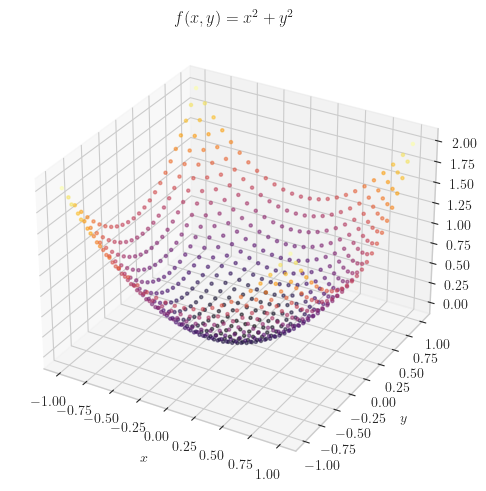

In [4]:
fig = plt.figure(figsize=(5, 5), tight_layout=True)
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xv, yv, zv, alpha=0.5, marker=".", cmap="inferno", c=zv)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")  # type: ignore
plt.title(rf"$f(x, y) = {sp.latex(z)}$")
plt.show()

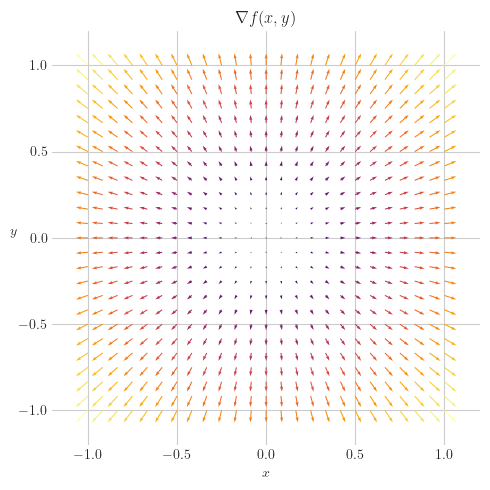

In [5]:
grad_func = tuple(sp.lambdify((x, y), ddv) for ddv in grad_z)
grad_x = grad_func[0](xv, yv)  # dz/dx
grad_y = grad_func[1](xv, yv)  # dz/dy
grad_in_xy = np.hypot(grad_x, grad_y)

fig = plt.figure(figsize=(5, 5), tight_layout=True)
ax = fig.add_subplot(111)

ax.quiver(xv, yv, grad_x, grad_y, grad_in_xy, cmap="inferno")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation=0)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
plt.title(r"$\nabla f(x, y)$")
plt.show()

### **3. Jacobian Matrix**

#### **Jacobian Matrix Definition**

The **Jacobian Matrix** is a matrix of first-order partial derivatives that describes the local linear approximation of a vector-valued function. Given a function  

$$
\mathbf{f} : \mathbb{R}^n \to \mathbb{R}^m
$$

that maps an $n$-dimensional input vector $ \mathbf{x} = (x_1, x_2, \dots, x_n) $ to an $m$-dimensional output vector $ \mathbf{f}(\mathbf{x}) = (f_1(\mathbf{x}), f_2(\mathbf{x}), \dots, f_m(\mathbf{x})) $, the **Jacobian Matrix** $ J $ is defined as:

$$
J(\mathbf{x}) =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

where each entry $ \frac{\partial f_i}{\partial x_j} $ represents the partial derivative of the $ i $-th output component with respect to the $ j $-th input variable.

The Jacobian matrix provides crucial information about the function's local behavior, including **sensitivity analysis**, **linear approximations**, and **transformations between coordinate systems**. In machine learning and optimization, it is often used for **backpropagation**, **gradient-based optimization**, and **stability analysis** in dynamical systems.


#### **Jacobian Matrix and Critical Points in Autonomous Differential Equations**

In the study of autonomous systems of differential equations, the **Jacobian Matrix** plays a crucial role in analyzing the stability of **critical points** (also called equilibrium points). Consider an autonomous system of the form:

$$
\frac{d\mathbf{x}}{dt} = \mathbf{f}(\mathbf{x})
$$

where $\mathbf{x} \in \mathbb{R}^n$ and $\mathbf{f} : \mathbb{R}^n \to \mathbb{R}^n$ is a continuously differentiable function. A **critical point** (or equilibrium) $\mathbf{x}^*$ satisfies:

$$
\mathbf{f}(\mathbf{x}^*) = \mathbf{0}.
$$

To analyze the behavior of solutions near a critical point, we linearize the system by considering a small perturbation $\mathbf{y}$ around $\mathbf{x}^*$:

$$
\mathbf{x} = \mathbf{x}^* + \mathbf{y}.
$$

Substituting this into the system and performing a first-order Taylor expansion around $\mathbf{x}^*$ gives:

$$
\frac{d\mathbf{y}}{dt} \approx J(\mathbf{x}^*) \mathbf{y},
$$

where $J(\mathbf{x}^*)$ is the **Jacobian matrix** of $\mathbf{f}$ evaluated at $\mathbf{x}^*$:

$$
J(\mathbf{x}) =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_n}
\end{bmatrix}.
$$

The stability of a critical point $\mathbf{x}^*$ is determined by the **eigenvalues** of the Jacobian matrix $J(\mathbf{x}^*)$:

- **Stable (Asymptotically Stable) Critical Point:** If all eigenvalues of $J(\mathbf{x}^*)$ have negative real parts, the equilibrium is **locally asymptotically stable** (small perturbations decay over time).
- **Unstable Critical Point:** If at least one eigenvalue has a positive real part, the equilibrium is **unstable** (small perturbations grow over time).
- **Saddle Point:** If some eigenvalues have negative real parts and others have positive real parts, the equilibrium is a **saddle point**.
- **Center (Neutrally Stable Point):** If all eigenvalues are purely imaginary (with zero real parts), the equilibrium is **neutrally stable** and solutions may exhibit periodic motion.

Let's analyze the following system of differential equations:
$$
\frac{dx}{dt} = 4x - 2xy\\
\frac{dy}{dt} = 2y + xy - 2y^2
$$

In [39]:
x0 = sp.symbols("x0")
x1 = sp.symbols("x1")

x = sp.Matrix([x0, x1])
x


Matrix([
[x0],
[x1]])

In [40]:
f = sp.Matrix([4 * x0 - 2 * x0 * x1, 2 * x1 + x0 * x1 - 2 * x1**2])
f

Matrix([
[       -2*x0*x1 + 4*x0],
[x0*x1 - 2*x1**2 + 2*x1]])

In [41]:
J = f.jacobian(x)
J

Matrix([
[4 - 2*x1,         -2*x0],
[      x1, x0 - 4*x1 + 2]])

In [42]:
c0 = sp.Matrix([0, 0])
c1 = sp.Matrix([0, 1])
c2 = sp.Matrix([2, 2])

Jc0 = J.subs({x0: c0[0], x1: c0[1]})
Jc1 = J.subs({x0: c1[0], x1: c1[1]})
Jc2 = J.subs({x0: c2[0], x1: c2[1]})

In [ ]:
Jc0.eigenvals()  # Two positive eigenvalues -> unstable node.

{4: 1, 2: 1}

In [44]:
Jc1.eigenvals()  # One positive and one negative eigenvalue -> saddle point.

{2: 1, -2: 1}

In [45]:
Jc2.eigenvals()  # Imaginary eigenvalues with negative real part -> stable spiral.

{-2 - 2*I: 1, -2 + 2*I: 1}

#### **Jacobian Matrix and Newton’s Method for Finding Function Roots**

The **Jacobian matrix** plays a crucial role in extending **Newton’s method** from scalar functions to **systems of nonlinear equations**. Given a system of $n$ nonlinear equations:

$$
\mathbf{f}(\mathbf{x}) =
\begin{bmatrix}
f_1(x_1, x_2, \dots, x_n) \\
f_2(x_1, x_2, \dots, x_n) \\
\vdots \\
f_n(x_1, x_2, \dots, x_n)
\end{bmatrix}
= 0,
$$

where $\mathbf{x} \in \mathbb{R}^n$ and $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$, we seek to find a solution $\mathbf{x}^*$ such that:

$$
\mathbf{f}(\mathbf{x}^*) = 0.
$$

#### **Newton’s Method in One Dimension**

For a scalar function $f(x)$, Newton’s method iteratively refines an approximation $x_k$ using the update rule:

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

This relies on a first-order **Taylor series expansion** of $f(x)$ around $x_k$.

#### **Newton’s Method for Systems: Using the Jacobian Matrix**

For a **vector-valued function**, we generalize Newton’s method by using the **Jacobian matrix**:

$$
J(\mathbf{x}) =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_n}
\end{bmatrix}.
$$

The **Newton iteration formula** for systems is:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - J(\mathbf{x}_k)^{-1} \mathbf{f}(\mathbf{x}_k).
$$

Since directly computing the inverse of $J(\mathbf{x}_k)$ can be computationally expensive, we typically solve the linear system:

$$
J(\mathbf{x}_k) \mathbf{d}_k = -\mathbf{f}(\mathbf{x}_k)
$$

for $\mathbf{d}_k$, and then update:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k + \mathbf{d}_k.
$$
